In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Hospital General Information.csv", encoding= 'latin')

#16. Do for-profit hospitals have better ratings than non-profit hospitals?

In [ ]:
df['Hospital overall rating'] = pd.to_numeric(df['Hospital overall rating'], errors= 'coerce')
df = df.dropna(subset= ['Hospital overall rating'])
df_filtered = df[df['Hospital Ownership'].str.contains("For-Profit | Non-Profit", na= False)]

<ipython-input-15-c0b5f9e358c5>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data= df_filtered, x= 'Hospital Ownership', y= 'Hospital overall rating',ci= None, palette= 'coolwarm')


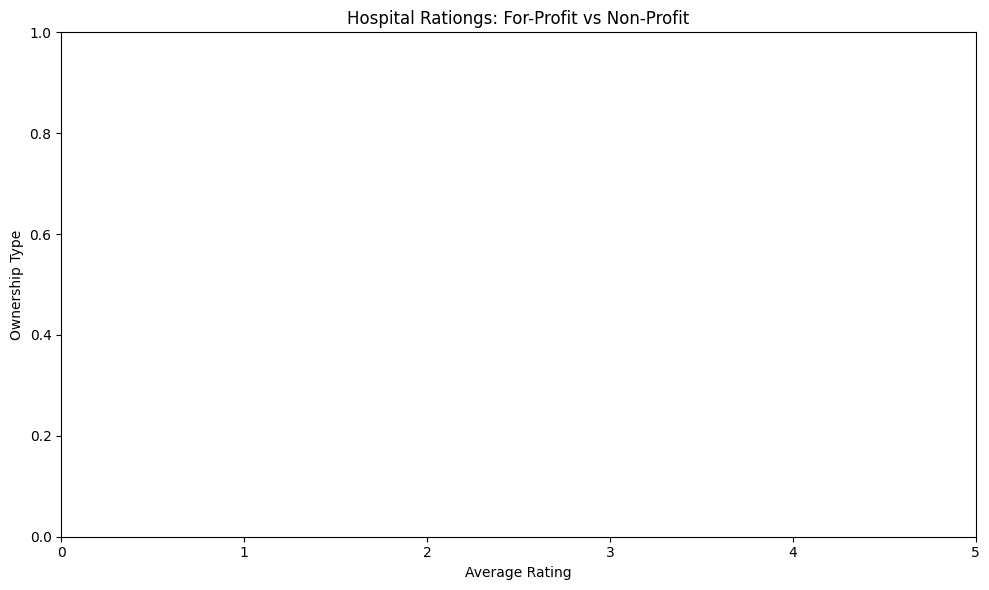

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data= df_filtered, x= 'Hospital Ownership', y= 'Hospital overall rating',ci= None, palette= 'coolwarm')
plt.title("Hospital Rationgs: For-Profit vs Non-Profit")
plt.xlabel("Average Rating")
plt.ylabel("Ownership Type")
plt.xlim(0,5)
plt.tight_layout()
plt.show()

#17. Are hospitals with emergency services rated higher on average?

In [ ]:
avg_rating_emergency = df.groupby('Emergency Services')['Hospital overall rating'].mean()
print(avg_rating_emergency)

Emergency Services
No     3.258427
Yes    3.054054
Name: Hospital overall rating, dtype: float64


<ipython-input-12-0bc15a5e16dd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= df, x= "Emergency Services", y= "Hospital overall rating", palette= 'viridis')


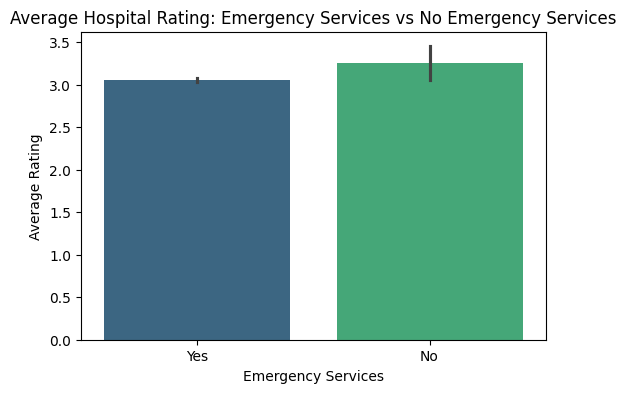

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(data= df, x= "Emergency Services", y= "Hospital overall rating", palette= 'viridis')
plt.title("Average Hospital Rating: Emergency Services vs No Emergency Services")
plt.ylabel("Average Rating")
plt.xlabel("Emergency Services")
plt.show()

#18. Is there a correlation between hospital ownership and mortality ratings?

In [ ]:
print(df['Hospital Ownership'].unique())
print(df['Mortality national comparison'].unique())

['Government - Hospital District or Authority'
 'Voluntary non-profit - Private' 'Proprietary' 'Government - State'
 'Voluntary non-profit - Other' 'Government - Local'
 'Voluntary non-profit - Church' 'Government - Federal' 'Tribal'
 'Physician']
['Same as the national average' 'Below the national average'
 'Not Available' 'Above the national average']


In [ ]:
mortality_df= df[df['Mortality national comparison'] != 'Not Available']

In [ ]:
ownership_mortality = mortality_df.groupby(['Hospital Ownership', 'Mortality national comparison']).size().unstack().fillna(0)
print(ownership_mortality)

Mortality national comparison                Above the national average  \
Hospital Ownership                                                        
Government - Federal                                                1.0   
Government - Hospital District or Authority                        13.0   
Government - Local                                                  5.0   
Government - State                                                  5.0   
Physician                                                           4.0   
Proprietary                                                        74.0   
Tribal                                                              0.0   
Voluntary non-profit - Church                                      42.0   
Voluntary non-profit - Other                                       37.0   
Voluntary non-profit - Private                                    219.0   

Mortality national comparison                Below the national average  \
Hospital Ownership      

In [ ]:
ownership_mortality_percent = ownership_mortality.div(ownership_mortality.sum(axis=1), axis= 0) * 100
print(ownership_mortality_percent)

Mortality national comparison                Above the national average  \
Hospital Ownership                                                        
Government - Federal                                           7.692308   
Government - Hospital District or Authority                    4.290429   
Government - Local                                             2.272727   
Government - State                                            12.500000   
Physician                                                     30.769231   
Proprietary                                                   12.780656   
Tribal                                                         0.000000   
Voluntary non-profit - Church                                 14.046823   
Voluntary non-profit - Other                                  10.662824   
Voluntary non-profit - Private                                14.436388   

Mortality national comparison                Below the national average  \
Hospital Ownership      

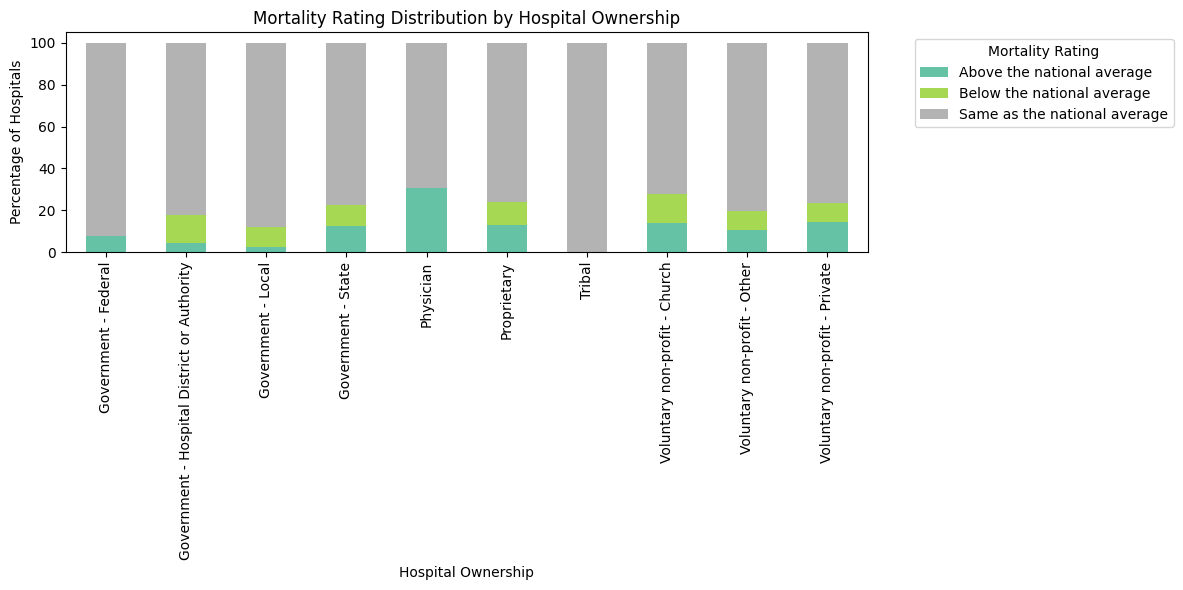

In [ ]:
ownership_mortality_percent.plot(kind= 'bar', stacked= True, figsize= (12,6), colormap= 'Set2')
plt.title('Mortality Rating Distribution by Hospital Ownership')
plt.ylabel("Percentage of Hospitals")
plt.xlabel("Hospital Ownership")
plt.legend(title= "Mortality Rating", bbox_to_anchor= (1.05, 1), loc= 'upper left')
plt.tight_layout()
plt.show()


#19. Do hospitals with better patient experience ratings have lower readmission rates?

In [ ]:
print(df['Patient experience national comparison'].unique())
print(df['Readmission national comparison'].unique())

['Below the national average' 'Same as the national average'
 'Not Available' 'Above the national average']
['Same as the national average' 'Above the national average'
 'Below the national average' 'Not Available']


In [ ]:
clean_df = df[
    (df['Patient experience national comparison'] != 'Not Available') &
    (df['Readmission national comparison'] != 'Not Available')
]

In [ ]:
pd.crosstab(
    clean_df['Patient experience national comparison'],
    clean_df['Readmission national comparison'],
    normalize= 'index'
).round(2)

Readmission national comparison,Above the national average,Below the national average,Same as the national average
Patient experience national comparison,,,
Above the national average,0.33,0.13,0.54
Below the national average,0.18,0.43,0.39
Same as the national average,0.25,0.22,0.53


In [ ]:
rating_map = {
    'Above the National Average': 3,
    'Same as the National Average': 2,
    'Below the National Average': 1
}

clean_df['Patient_experience_score'] = clean_df['Patient experience national comparison'].map(rating_map)
clean_df['Readmission_score'] = clean_df['Readmission national comparison'].map(rating_map)

<ipython-input-28-ddea4acad88d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Patient_experience_score'] = clean_df['Patient experience national comparison'].map(rating_map)
<ipython-input-28-ddea4acad88d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Readmission_score'] = clean_df['Readmission national comparison'].map(rating_map)


In [ ]:
correlation = clean_df[['Patient_experience_score', 'Readmission_score']].corr().iloc[0, 1]
print(f"Correlation between patient experience and readmission: {correlation:.2f}")

Correlation between patient experience and readmission: nan


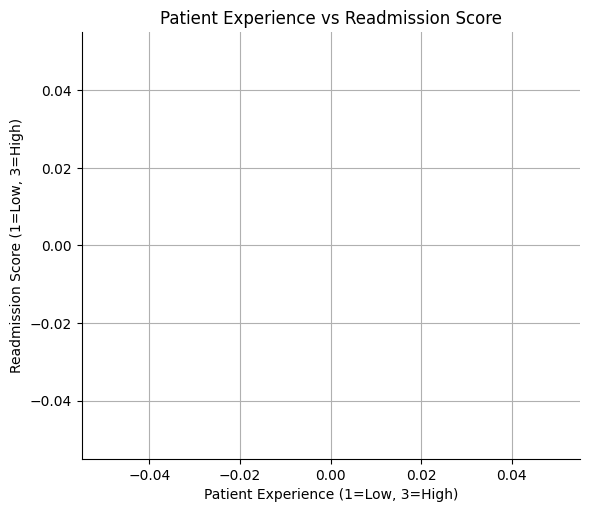

In [32]:
sns.lmplot(
    data= clean_df,
    x= 'Patient_experience_score',
    y= 'Readmission_score',
    height= 5,
    aspect= 1.2,
    scatter_kws= {'alpha': 0.5}
)
plt.title('Patient Experience vs Readmission Score')
plt.xlabel('Patient Experience (1=Low, 3=High)')
plt.ylabel('Readmission Score (1=Low, 3=High)')
plt.grid(True)
plt.show()


#20. What is the correlation between mortality and safety ratings?How does the timeliness of care vary across different states?

In [40]:
print(df['Mortality national comparison'].unique())
print(df['Safety of care national comparison'].unique())

['Same as the national average' 'Below the national average'
 'Not Available' 'Above the national average']
['Above the national average' 'Same as the national average'
 'Not Available' 'Below the national average']


In [41]:
df_clean = df[
    (df['Mortality national comparison'] != 'Not Available') &
    (df['Safety of care national comparison'] != 'Not Available')
]

In [43]:
rating_map = {
    'Below the National Average': 1,
    'Same as the National Average': 2,
    'Above the National Average': 3
}

df_clean['Mortality_score'] = df_clean['Mortality national comparison'].map(rating_map)
df_clean['Safety_score'] = df_clean['Safety of care national comparison'].map(rating_map)


<ipython-input-43-bc85b51a54cf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Mortality_score'] = df_clean['Mortality national comparison'].map(rating_map)
<ipython-input-43-bc85b51a54cf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Safety_score'] = df_clean['Safety of care national comparison'].map(rating_map)


In [44]:
correlation = df_clean[['Mortality_score', 'Safety_score']].corr().iloc[0, 1]
print(f"Correlation between mortality and safety ratings: {correlation:.2f}")


Correlation between mortality and safety ratings: nan


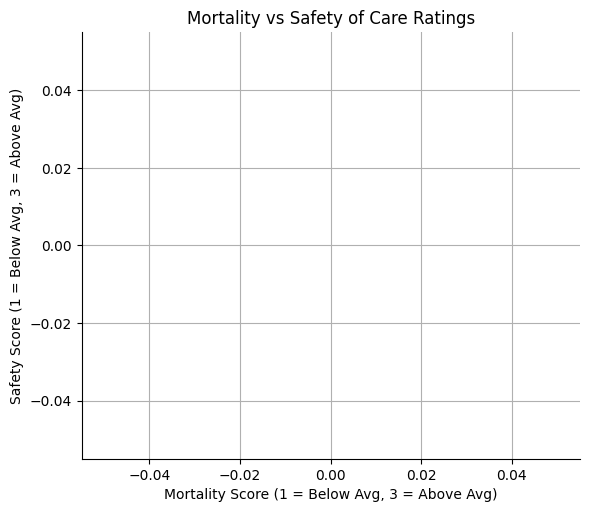

In [45]:
sns.lmplot(
    data=df_clean,
    x='Mortality_score',
    y='Safety_score',
    height=5,
    aspect=1.2,
    scatter_kws={'alpha': 0.5}
)
plt.title('Mortality vs Safety of Care Ratings')
plt.xlabel('Mortality Score (1 = Below Avg, 3 = Above Avg)')
plt.ylabel('Safety Score (1 = Below Avg, 3 = Above Avg)')
plt.grid(True)
plt.show()


#21. Do large states (more hospitals) have better or worse ratings than smaller states?

In [46]:
df.columns = df.columns.str.strip()

In [47]:
state_counts= df['State'].value_counts().reset_index()
state_counts.columns= ['State', 'Hospital_Count']

In [48]:
df = df.merge(state_counts, on='State', how='left')


In [49]:
rating_map = {
    'Below the National Average': 1,
    'Same as the National Average': 2,
    'Above the National Average': 3
}

df_filtered = df[df['Mortality national comparison'] != 'Not Available'].copy()
df_filtered['Mortality_score'] = df_filtered['Mortality national comparison'].map(rating_map)


In [50]:
state_avg = df_filtered.groupby('State').agg({
    'Hospital_Count': 'first',  # number of hospitals in that state
    'Mortality_score': 'mean'
}).reset_index()


In [51]:
correlation = state_avg['Hospital_Count'].corr(state_avg['Mortality_score'])
print(f"Correlation between hospital count and average mortality rating: {correlation:.2f}")


Correlation between hospital count and average mortality rating: nan


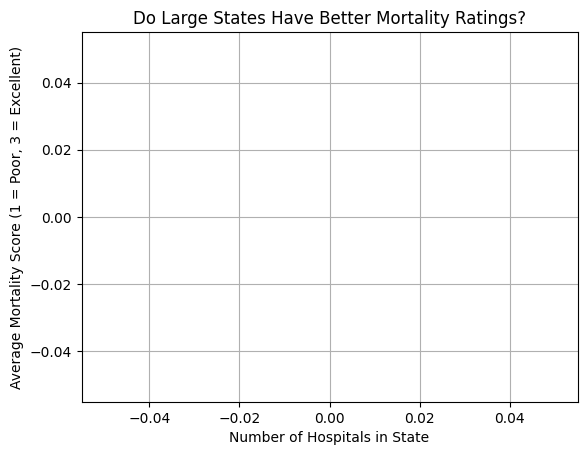

In [52]:
sns.regplot(
    data=state_avg,
    x='Hospital_Count',
    y='Mortality_score',
    scatter_kws={'alpha': 0.6}
)
plt.title('Do Large States Have Better Mortality Ratings?')
plt.xlabel('Number of Hospitals in State')
plt.ylabel('Average Mortality Score (1 = Poor, 3 = Excellent)')
plt.grid(True)
plt.show()
